In [51]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import re

import glob
%matplotlib inline

In [52]:

dire='/mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-08-20/'
files = glob.glob(dire+'*Kymograph*.h5')
print("molecule options:",end =" ")
for f in files:
    file = pylake.File(f)
    key = list(file.kymos.keys())[0]
    print(key,end =" ")
k=input("which molecule to look at? ")
for f in files:
    if re.search(r'\s' + k,f):
        filename=f
        print('opening '+filename)

molecule options: 12 bad boy 14 16 17 18 3 nice one 4 5 7 9 which molecule to look at? 17
opening /mnt/d/OneDrive - Johns Hopkins University/Ha_CCarcamo/Data/C_Trap/2019-08-20/20190820-191615 Kymograph 17.h5


In [74]:
# open file
file = pylake.File(filename)
kymos = list(file.kymos)
kymo_data = file.kymos[kymos[0]]
kymo = file.kymos[kymos[0]]

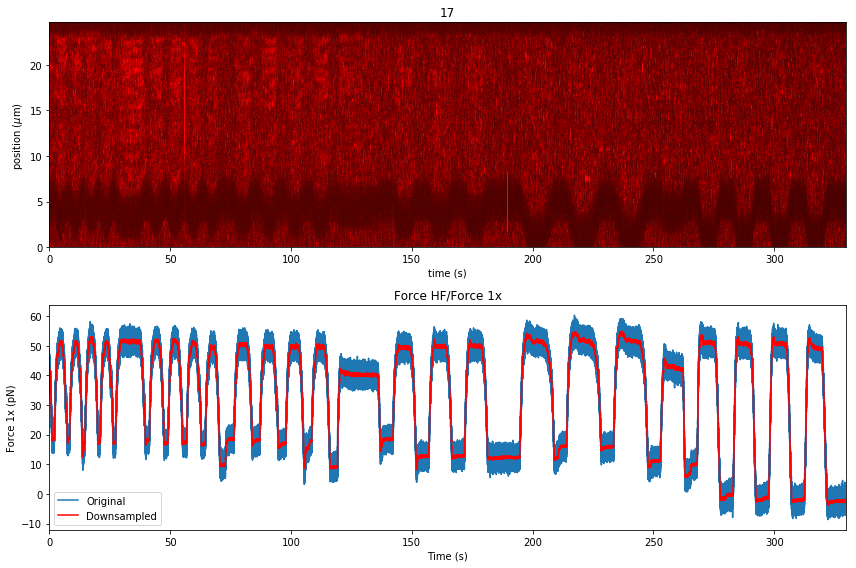

In [281]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
kymo.plot_red(vmax=240,vmin=-60,aspect='auto')   #this is the best looking vmax/vmin combo so far

plt.subplot(2,1,2)
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

#if you want to save
plt.savefig(dire+'kymo+force-'+k+'.png')

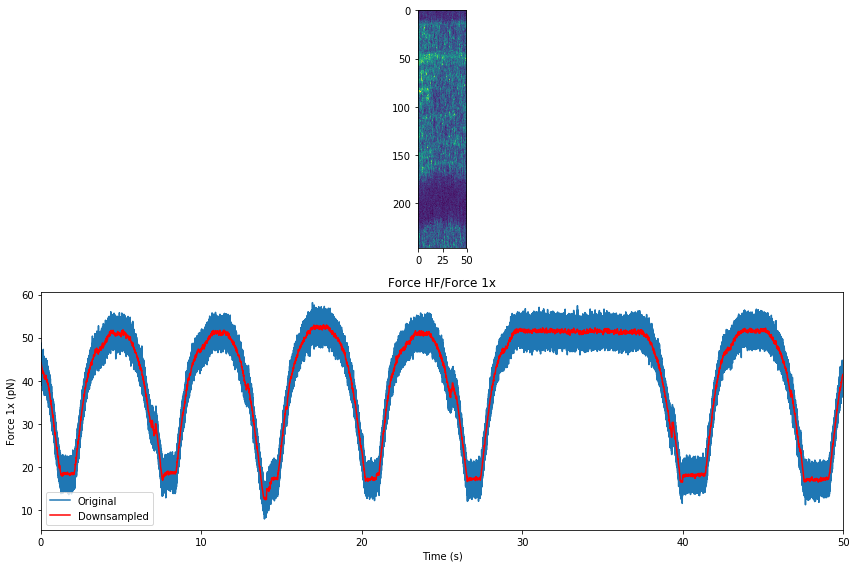

In [282]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
redi = kymo.red_image;
c = [False]*0 + [True]*50 # This is the problem, I am just out of ideas how to fix it
d = np.compress(c, redi, axis=1)
plt.imshow(d)
# kymo.plot_red(vmax=120,vmin=-30,aspect='auto')   #this is the best looking vmax/vmin combo so far

plt.subplot(2,1,2)
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']['0s':'50s']
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

#if you want to save
plt.savefig(dire+'kymo+force-'+k+'.png')

In [76]:

  
    fig = plt.figure(figsize=(12,8))
    forcex = file['Force HF']['Force 1x']
    time = forcex.timestamps/1e9
    time = time - time[0]
    sample_rate = forcex.sample_rate
    downsampled_rate = 100 # Hz
    forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
    time_downsamp = forcex_downsamp.timestamps/1e9
    time_downsamp = time_downsamp - time_downsamp[0]
    forcex.plot(label="Original")
    forcex_downsamp.plot(color='r',label="Downsampled")
    plt.ylabel('Force 1x (pN)')
    plt.xlim([0,max(time)])
    plt.legend()
    plt.tight_layout()

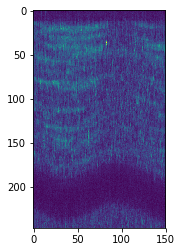

In [277]:
# fig = plt.figure(figsize=(12,8))

# pixperline = kymo.pixels_per_line;
# print(pixperline)
# times = kymo.timestamps
# times = (times - times[0]) * 1e-9 *1000

redi = kymo.red_image;
c = [False]*50 + [True]*150
d = np.compress(c, redi, axis=1)
plt.imshow(d)

In [ ]:
# fig = plt.figure(figsize=(12,8))
redi = kymo.red_image;
redi
# pixperline = kymo.pixels_per_line;
# print(pixperline)
# times = kymo.timestamps
# times = (times - times[0]) * 1e-9 *1000
# times_crop = times[10:247]
# print(times_crop)
# times_crop[2,500]
# kymo.timestamps
# t = times[246,1]
# print(t)
# result_array = np.empty((0, pixperline))

# result_array =[]

# for i in range(0, pixperline):
#     cropped_one[i]=times[i,1]

# for i in range(0, pixperline):
#     result = times[i,1]
#     result_array = np.append(result_array, [result], axis=0)

# result_array
# c = [False]*50 + [True]*150
# d = np.compress(c, redi, axis=1)
# plt.imshow(d)

In [197]:
a = np.array([[1, 2], [3, 4], [5, 6],[1, 2], [3, 4], [5, 6]])
a
c = [False]*2 + [True]*2 + [False]*2
# c = range(1, 5)
# list(c)
b = np.compress(c, a, axis=0)
b

g = [1,2,3,4,5,6,7,8,9,10,11,12,13]
c = range(1, 14, 2)
h = g[::5]
h

[1, 6, 11]